# Face Recognition Olivetti dataset

[scikit-learn.org: The Olivetti faces dataset](https://scikit-learn.org/stable/datasets/real_world.html#olivetti-faces-dataset)
[www.kaggle.com: Olivetti Faces](https://www.kaggle.com/datasets/sahilyagnik/olivetti-faces?datasetId=11928)

In [1]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.cluster import KMeans
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
photos = sklearn.datasets.fetch_olivetti_faces(data_home='../data/scikit_learn_data', shuffle=False, random_state=123, return_X_y=False)
print(photos.keys())
print(photos.DESCR)

AttributeError: module 'sklearn' has no attribute 'datasets'

Первые 2 человека в датасете по 10 фото на каждого

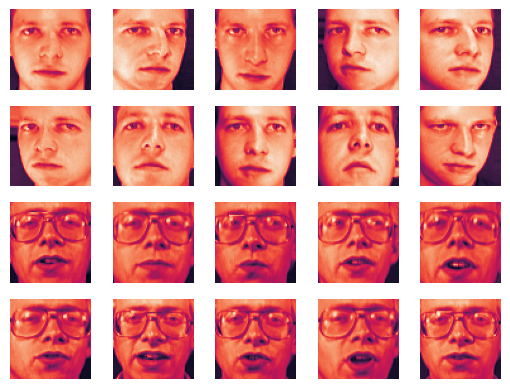

In [20]:
n = 20
n_cols = 5
n_rows = n // n_cols
for i in range(n):
    plt.subplot(n_rows, n_cols, i+1)
    plt.imshow(photos.images[i, :, :])    # , cmap='gray'
    plt.axis('off')
plt.show()

Разделим датасет на обучающий и тренировочный (например 80/20%). Будем использовать StratifiedShuffleSplit потому, что в наборе всего по 10 наблюдений на каждого человека. Необходимо быть уверенным, что в обучающую выборку попадут наблюдения для каждого, и это будет сделано справедливо :)

In [8]:
train_index, test_index = next(StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123).split(X=photos.data, y=photos.target))

In [9]:
X_train = photos.data[train_index]
X_test = photos.data[test_index]
y_train = photos.target[train_index]
y_test = photos.target[test_index]

Попробуем найти оптимальное количество кластеров. Из характеристик датасета оно известно, 40. Будем ожидать точку перегиба (локоть) на количестве кластеров = 40. Построим график инерции

<AxesSubplot: >

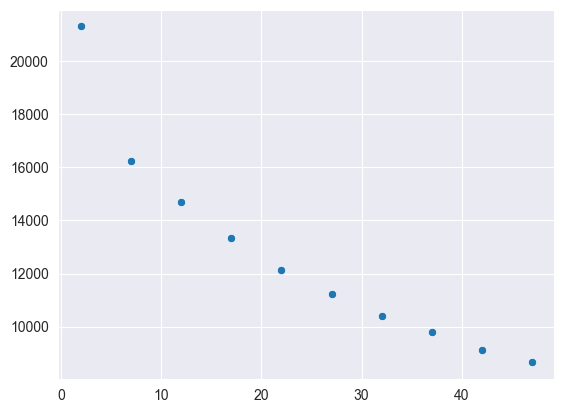

In [12]:
x_inertia = list(range(2, 50, 5))
y_inertia = [KMeans(n_clusters=cluster, random_state=123).fit(X=X_train, y=y_train).inertia_ for cluster in x_inertia]
sns.scatterplot(x=x_inertia, y=y_inertia)

На графике не видно явного плеча, точки перегиба. По всей видимости эти данные (просто битмап изображения без привязки к параметрам распознования лиц) не подходят для такого анализа

Оптимальное количество кластеров можно выбрать с помощью [коэффициента силуэта](https://scikit-learn.org/stable/modules/clustering.html?highlight=silhouette_score#silhouette-coefficient), [sklearn.metrics.silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html?highlight=silhouette_score#sklearn.metrics.silhouette_score). Пример использования [Selecting the number of clusters with silhouette analysis on KMeans clustering](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py)